## Clustering
<img width=500 height=500 class="imgright" src="Images/Cluster.png">
Clustering ist eine Methode im Bereich des unüberwachten Lernens. Wir erhalten Datensätze mit ihren Features aber <b>keine</b> Labels. Ziel der Methode ist es, die Datensätze in sogenannte Cluster aufzuteilen mit ähnlichen Eigenschaften. <b>Danach muss der User beurteilen, ob diese Cluster im Rahmen der Fragestellung sinnvoll sind.</b> Clustering kann z.B. verwendet werden, um einen Kundenstamm in Untergruppen aufzuteilen, damit diese Gruppen gezielt individuelle Werbung erhalten können. Wir machen híer ein Beispiel für die Kunden eines Unternehmens, von denen wir wissen, wieviel sie insgesamt für Produkte der Firma ausgegeben haben und welche Gesamtkosten für die personifizierte Kundenbetreuung angefallen sind.


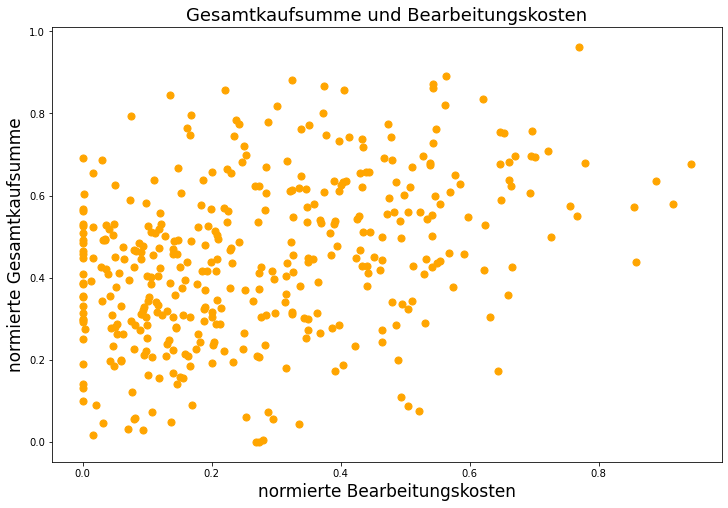

In [1]:
import matplotlib.pyplot as plt
import numpy as np

with open("Data/cluster_data.txt","r") as fh:
    px,py=[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        px.append(float(rawlist[0])) #die eingelesenen Werte werden in floats verwandelt
        py.append(float(rawlist[1]))

plt.figure(figsize=(12,8)) 
plt.title("Gesamtkaufsumme und Bearbeitungskosten",fontsize=18)
plt.xlabel("normierte Bearbeitungskosten",fontsize=17)
plt.ylabel("normierte Gesamtkaufsumme",fontsize=17)
plt.scatter(px,py,color="orange",s=50)
plt.show()
    

Beim Clustering werden Distanzen zwischen Punkten berechnet, die meist mit dem Euklidschen Abstand bestimmt werden, der für carthesische 2-dimensionale Koordinatensysteme wie unten berechnet werden kann:<br><br>
$$ Distanz_{1,2}={\sqrt{(x1-x2)^2 + (y1-y2)^2}}$$<br>


#### Entfernungsmetriken zur Wiederholung

Wir wir bereits ausführlich erwähnt haben, berechnen wir die Abstände zwischen den Punkten der Stichprobe und dem zu klassifizierenden Objekt. 
Zur Berechnung dieser Abstände benötigen wir eine Abstandsfunktion. 

In n-dimensionalen Vektorräumen, benutzt man meistens einer der folgenden drei Abstandsmetriken:

- **Euklidischer-Abstand**
    
    Der euklidische Abstand zwischen zwei Punkten `x` und `y` entweder in der Ebene oder im 3-dimensionalen Raum entspricht der Länge der Strecke, die diese beiden Punkte verbindet. Es kann aus den kartesischen Koordinaten der Punkte mit dem Satz des Pythagoras berechnet werden, daher wird es gelegentlich auch die Pythagoros-Entfernung bezeichnet. Die allgemeine Formel lautet:
     
    $$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i -y_i)^2}$$
    
- **Manhatten-Abstand**
    
    Es ist definiert als die Summe der absoluten Werte zwischen den Koordinaten von x und y :
    $$d(x, y) = \sum_{i=1}^{n} |x_i -y_i|$$
    
- **Minkowski-Abstand**
    
    Der Minkowski-Abstand verallgemeinert den Euklidischen und  Manhatten-Abstand in einer Distanzmetrik. Wenn wir den Parameter `p` in der folgenden Formel auf 1 einstellen, erhalten wir den Manhatten-Abstand, und mit dem Wert 2 erhalten wir den Euklidischen-Abstand:
    $$d(x, y) = { \left(\sum_{i=1}^{n} (x_i -y_i)^p \right)}^{\frac{1}{p}}$$
    
Das folgende Diagramm veranschaulicht den Zusammenhang zwischen Manhatten- und Euklidschem Abstand:    
    
<img width=30% src="Images/manhattan_distance_visualization.png"  alt="Manhattan and Euclidean distance" /> 

Die blaue Linie veranschaulicht den Euklidschen Abstand zwischen dem grünen und dem roten Punkt. Ansonsten kann man sich auch über die orange, grüne oder gelbe Linie vom grünen Punkt zum roten Punkt bewegen. Die Linien entsprechen der Manhatten-Distanz. Die Länge ist jeweils gleich.
<br><br>
Es ist leicht einzusehen, daß wenn sich die y-Skala von der x-Skala im Wertebereich stark unterscheidet, wie dies in unserem Beispiel gegeben ist, diese Rechnung kein vernünftiges Abstandsmaß ergibt, da z.B. in unserem Beispiel der Abstand zweier Punkte in x-Richtung gegenüber dem Abstand in y-Richtung sehr viel kleiner ist. z.B. dx=2 und dy=600.<br>
Um unsere Formel sinnvoll nutzen zu können, müssen wir für die y-Skala und die x-Skala den gleichen Maßstab verwenden, was wir durch normalisieren (wir rechnen den Unterschied zwischen Maximal- und
Minimalwert auf der jeweiligen Skala aus und setzen dann diese beiden Werte auf 1 und 0 und rechnen alle anderen Punkte mit einem Dreisatz auf diese Werte um) und schaffen können. Wir haben dann auf beiden Achsen nur noch Werte zwischen 0 und 1. <br>
Das Ergebnis sehen wir unten.

Eine beliebte Methode zum Clustering nennt sich <b>k-Means-Algorithmus</b>. Hierbei werden entsprechend der Anzahl zu differenzierenden Clustern zunächst in den Wertebereich genau k Punkte auf zufällige Positionen gesetzt, die Centroide. Hier ergibt sich schon die erste Schwäche des Algorithmus, die Anzahl der zu ereichenden Cluster muss vorgegeben werden. Dazu später mehr. Für 3 willkürliche Centroide sähe dann die Ausgangssituation z.B. so aus:

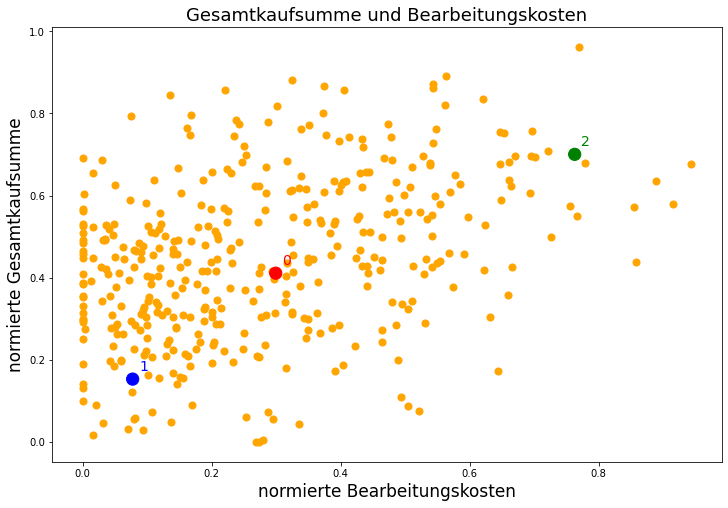

In [2]:
import matplotlib.pyplot as plt


with open("Data/cluster_data.txt","r") as fh:
    px,py=[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        px.append(float(rawlist[0])) #die eingelesenen Werte werden in floats verwandelt
        py.append(float(rawlist[1]))
centroidx,centroidy,centroidnr=np.array([0.2993333705400607, 0.07755763236885971, 0.7627303735165747]),\
np.array([0.41108052018170826, 0.15321155255518004, 0.7004239803876297]),np.array([0,1,2]) #dies sind die 3 Centroid - Werte aus der Abbildung
colormap=np.array(["red","blue","green"])
plt.figure(figsize=(12,8)) 
plt.title("Gesamtkaufsumme und Bearbeitungskosten",fontsize=18)
plt.xlabel("normierte Bearbeitungskosten",fontsize=17)
plt.ylabel("normierte Gesamtkaufsumme",fontsize=17)
plt.scatter(px,py,color="orange",s=50)
plt.scatter(centroidx,centroidy,c=colormap[centroidnr],s=150)
for x,y,z in zip(centroidx,centroidy,centroidnr):
    plt.text(x+.01, y+.02, str(z),color=colormap[z] , fontsize=14)
    
plt.show()

Die Leistungsfähigkeit des Algorithmus hängt auch etwas von der Wahl dieser Ausgangscentroide ab, sie sollten schon über den möglichen Raum verteilt sein.
Nun wird für alle Punkte bestimmt, zu welchem Centroid der Abstand am geringsten ist, die Punkte werden dann diesem Centroid zugeordnet. <br> Wir zeigen unten ein Beispiel der Berechnung für unsere 400 Punkte mit dem geringsten Abstand zum jeweiligen Centroid. 

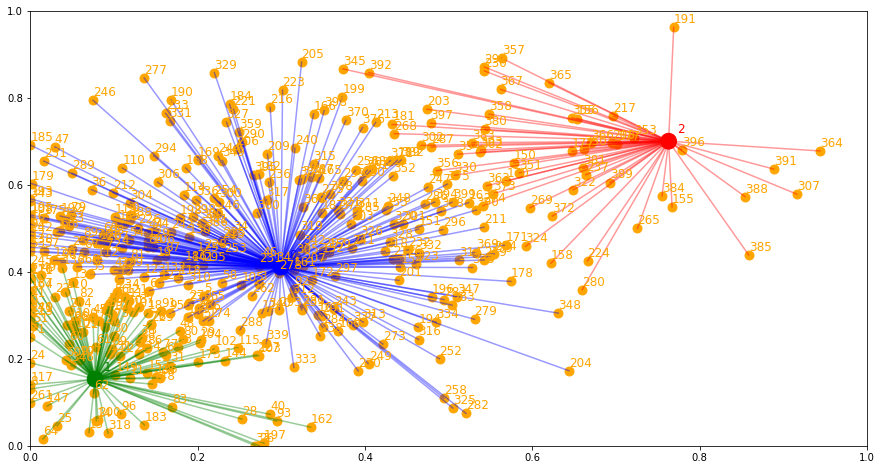

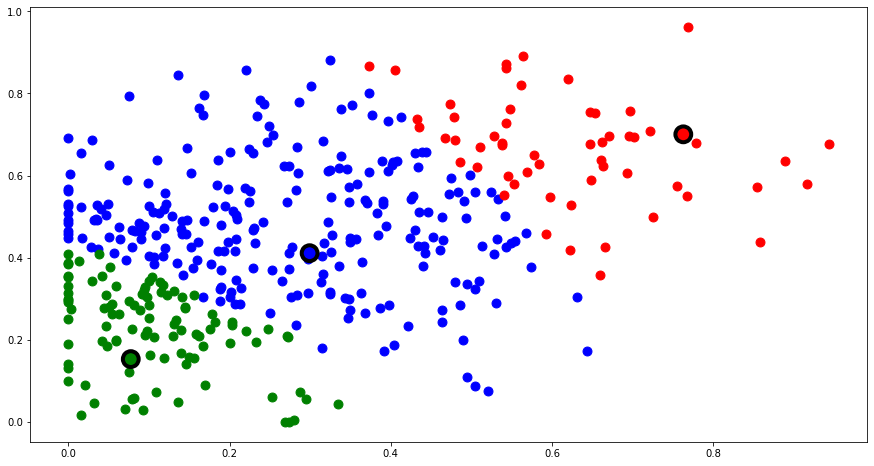

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(431)
def Distanz(x1,x2,y1,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

with open("Data/cluster_data.txt","r") as fh:
    px,py=[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        px.append(float(rawlist[0])) #die eingelesenen Werte werden in floats verwandelt
        py.append(float(rawlist[1]))

 
centroidx,centroidy,centroidnr=np.array([0.2993333705400607, 0.07755763236885971, 0.7627303735165747]),\
np.array([0.41108052018170826, 0.15321155255518004, 0.7004239803876297]),np.array([0,1,2]) #dies sind die 3 Centroid - Werte aus der Abbildung

centroid_list=[[],[],[]] #soll den Abstand jedes Punktes zu jedem der 3 Centroide enthalten

for i in range(len(px)):
    for j in range(len(centroidx)):        
        centroid_list[j].append(Distanz(px[i],centroidx[j],py[i],centroidy[j])) #Trage den Abstand jedes Punktes in 
                                                                                #die entsprechenden 3 Unterlisten von 
von,bis=0,401                                                                                #centroid_list ein

cluster=[[],[],[]]

for i in range(len(px)): #bestimme welcher Abstand in den 3 Teillisten von centroid_liste für jeden Punkt am
                         #kleinsten ist und ordne die Koordinaten des Punktes dem entsprecheden Cluster zu
    if centroid_list[0][i]>centroid_list[2][i] and centroid_list[1][i]>centroid_list[2][i]: #Liste 2 am kleinsten
        cluster[2].append([px[i],py[i]])
        continue
    elif centroid_list[0][i]>centroid_list[1][i]: #Liste1 am Kleinsten
        cluster[1].append([px[i],py[i]])
        continue
    else:            
        cluster[0].append([px[i],py[i]]) #Liste0 am Kleinsten
plt.figure(figsize=(15,8))        
colormap=np.array(["blue","green","red"])
xs,ys=px[von:bis],py[von:bis]
plt.xlim([0, 1])
plt.ylim([0,1])
plt.scatter(xs, ys, color="orange",s=80)
plt.scatter(centroidx,centroidy,c=colormap[centroidnr],s=250)
i=0
for x, y in zip(xs, ys):
    plt.text(x, y+.01, str(i+von), color="orange", fontsize=12)
    i+=1

for x,y,z in zip(centroidx,centroidy,centroidnr):
    plt.text(x+.01, y+.02, str(z),color=colormap[z] , fontsize=12)
    
for x,y in zip(xs,ys):
    if [x,y] in cluster[0]:
        plt.plot((x,centroidx[0]),(y,centroidy[0]),c="b",alpha=.4)
    elif [x,y] in cluster[1]:
        plt.plot((x,centroidx[1]),(y,centroidy[1]),c="g",alpha=.4)
    else:
        plt.plot((x,centroidx[2]),(y,centroidy[2]),c="r",alpha=.4)
  
plt.show()
cluster0,cluster1,cluster2=np.array(cluster[0]),np.array(cluster[1]),np.array(cluster[2])
plt.figure(figsize=(15,8))

plt.scatter(cluster0[:,0],cluster0[:,1],c=colormap[0],s=80)
plt.scatter(cluster1[:,0],cluster1[:,1],c=colormap[1],s=80)
plt.scatter(cluster2[:,0],cluster2[:,1],c=colormap[2],s=80)
plt.scatter(centroidx,centroidy,c=colormap[centroidnr],s=250,edgecolor="black",linewidth=4)
plt.show()

Für alle Punkte eines jeden Clusters wird nun bestimmt, wo der Mittelpunkt liegt, um den sie sich gruppieren. Dies wird einfach erreicht, indem man die x-Werte und die y-Werte aller jeweiligen Punkte mittelt.<b> Dieser Clustermittelpunkt ist nicht identisch mit dem jeweiligen Centroid!</b> 

Das Ergebnis sehen wir hier (die helleren Punkte sind die Clusterschwerpunkte und damit die neuen Centroide).

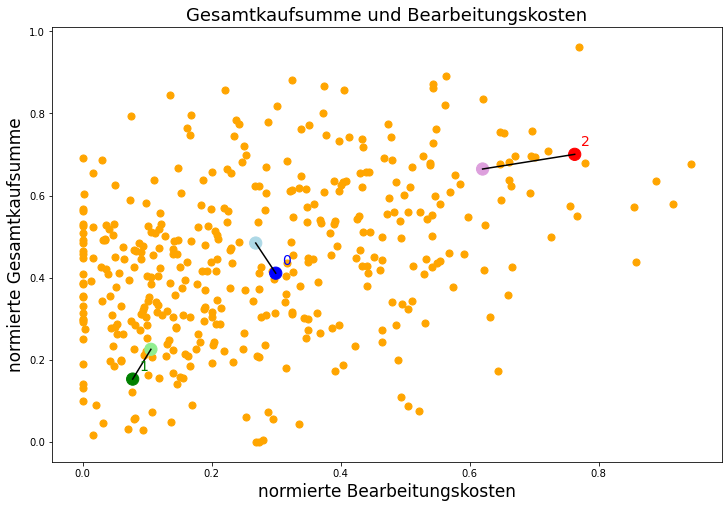

In [4]:
import math
import matplotlib.pyplot as plt
def Distanz(x1,x2,y1,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
with open("Data/cluster_data.txt","r") as fh:
    px,py=[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        px.append(float(rawlist[0])) #die eingelesenen Werte werden in floats verwandelt
        py.append(float(rawlist[1]))
                 
centroidx,centroidy=[0.2993333705400607, 0.07755763236885971, 0.7627303735165747],\
[0.41108052018170826, 0.15321155255518004, 0.7004239803876297] #dies sind die 3 Centroid - Werte aus der Abbildung

centroid_list=[[],[],[]] #soll den Abstand jedes Punktes zu jedem der 3 Centroide enthalten

for i in range(len(px)):
    for j in range(len(centroidx)):        
        centroid_list[j].append(Distanz(px[i],centroidx[j],py[i],centroidy[j])) #Trage den Abstand jedes Punktes in 
                                                                                #die entsprechenden 3 Unterlisten von 
                                                                                #centroid_list ein


cluster=[[],[],[]]

for i in range(len(px)): #bestimme welcher Abstand in den 3 Teillisten von centroid_liste für jeden Punkt am
                         #kleinsten ist und ordne die Koordinaten des Punktes dem entsprecheden Cluster zu
    if centroid_list[0][i]>centroid_list[2][i] and centroid_list[1][i]>centroid_list[2][i]: #Liste 2 am kleinsten
        cluster[2].append([px[i],py[i]])
        continue
    elif centroid_list[0][i]>centroid_list[1][i]: #Liste1 am Kleinsten
        cluster[1].append([px[i],py[i]])
        continue
    else:            
        cluster[0].append([px[i],py[i]])
        

colormap=np.array(["blue","green","red"])
colormap1=np.array(["lightblue","lightgreen","plum"])
new_centroidx,new_centroidy=[],[]
for c_num in range(3):    #alle Cluster
    sumx,sumy,anzahl_punkte=0,0,len(cluster[c_num]) #alle Punkte in diesem Cluster
    for i in range(anzahl_punkte):
        sumx+=cluster[c_num][i][0]
        sumy+=cluster[c_num][i][1]
    new_centroidx.append(sumx/anzahl_punkte)
    new_centroidy.append(sumy/anzahl_punkte)
nc_x,nc_y=[],[]    
for i in range(3):
    nc_x.append(new_centroidx[i])
    nc_y.append(new_centroidy[i])
nc_x=np.array(nc_x)
nc_y=np.array(nc_y)
nc_nr=np.array([0,1,2])
centroidx,centroidy,centroidnr=np.array([0.2993333705400607, 0.07755763236885971, 0.7627303735165747]),\
np.array([0.41108052018170826, 0.15321155255518004, 0.7004239803876297]),np.array([0,1,2]) #dies sind die 3 Centroid - Werte aus der Abbildung

plt.figure(figsize=(12,8)) 
plt.title("Gesamtkaufsumme und Bearbeitungskosten",fontsize=18)
plt.xlabel("normierte Bearbeitungskosten",fontsize=17)
plt.ylabel("normierte Gesamtkaufsumme",fontsize=17)
plt.scatter(px,py,color="orange",s=50)
plt.scatter(centroidx,centroidy,c=colormap[centroidnr],s=150)
for x,y,z in zip(centroidx,centroidy,centroidnr):
    plt.text(x+.01, y+.02, str(z),color=colormap[z] , fontsize=14)
plt.scatter(nc_x,nc_y,c=colormap1[nc_nr],s=150) 
plt.plot((nc_x,centroidx),(nc_y,centroidy),c="black",alpha=1)
plt.show()


Die Centroide werden dann auf die Clustermittelpunkte gesetzt. Dieser Vorgang wird solange wiederholt, bis die Centroide sich nicht mehr bewegen, dies ist dann das Ergebnis des Clustering.

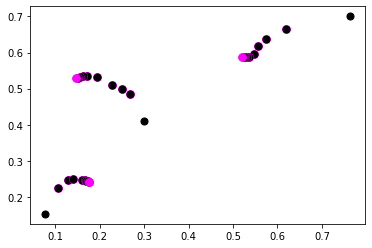

In [5]:
import math
import matplotlib.pyplot as plt
import copy
def Distanz(x1,x2,y1,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
with open("Data/cluster_data.txt","r") as fh:
    px,py=[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        px.append(float(rawlist[0])) #die eingelesenen Werte werden in floats verwandelt
        py.append(float(rawlist[1]))
                 
centroidx,centroidy=[0.2993333705400607, 0.07755763236885971, 0.7627303735165747],\
[0.41108052018170826, 0.15321155255518004, 0.7004239803876297] #dies sind die 3 Centroid - Werte aus der Abbildung

abbruch=1E-2 #wenn die Abstandssumme der neuen zu den alten Centroiden unter diesen Wert fällt -->abbrechen

while True:

    centroid_list=[[],[],[]] #soll den Abstand jedes Punktes zu jedem der 3 Centroide enthalten
    
    for i in range(len(px)):
        for j in range(len(centroidx)):        
            centroid_list[j].append(Distanz(px[i],centroidx[j],py[i],centroidy[j])) #Trage den Abstand jedes Punktes in 
                                                                                    #die entsprechenden 3 Unterlisten von 
                                                                                    #centroid_list ein
    
    
    cluster=[[],[],[]]
    
    for i in range(len(px)): #bestimme welcher Abstand in den 3 Teillisten von centroid_liste für jeden Punkt am
                             #kleinsten ist und ordne die Koordinaten des Punktes dem entsprecheden Cluster zu
        if centroid_list[0][i]>centroid_list[2][i] and centroid_list[1][i]>centroid_list[2][i]: #Liste 2 am kleinsten
            cluster[2].append([px[i],py[i]])
            continue
        elif centroid_list[0][i]>centroid_list[1][i]: #Liste1 am Kleinsten
            cluster[1].append([px[i],py[i]])
            continue
        else:            
            cluster[0].append([px[i],py[i]])
            
    
        
    new_centroidx,new_centroidy=[],[]
    for c_num in range(3):    #alle Cluster
        sumx,sumy,anzahl_punkte=0,0,len(cluster[c_num]) #alle Punkte in diesem Cluster
        for i in range(anzahl_punkte):
            sumx+=cluster[c_num][i][0]
            sumy+=cluster[c_num][i][1]
        new_centroidx.append(sumx/anzahl_punkte) #new_centroid ist der Durchschnitt der x Werte der Punkte des 
                                                 #jeweiligen Clusters
        new_centroidy.append(sumy/anzahl_punkte)
        
    ###################zur graphischen Darstellung###################    
    
    colors=["red","blue","green"]
    for c_num in range(3):
        cx,cy=[],[]
        for i in range(len(cluster[c_num])):
            cx.append(cluster[c_num][i][0])
            cy.append(cluster[c_num][i][1])
        
    for i in range(len (centroidx)):
        plt.scatter(centroidx[i],centroidy[i],c="black",s=50)
        pass
    
    for i in range(len (centroidx)):
        plt.scatter(new_centroidx[i],new_centroidy[i],c="magenta",s=60)
        pass
   ####################################################################
    diff_sum=0
    for i in range(3):
        diff_sum+=Distanz(centroidx[i],new_centroidx[i],centroidy[i],new_centroidy[i]) #Summiert die Abstände der alten zu
                                                                                      # den jeweiligen neuen Centroiden
    if diff_sum<abbruch: #Kaum mehr Bewegung der Centroide
        break
    else:
        centroidx=copy.deepcopy(new_centroidx)
        centroidy=copy.deepcopy(new_centroidy)

plt.show()

Hier sehen wir, wie sich die Centroide bewegt haben, und wie die Zuordnung der Punkte am Schluss ist.

<br><br><img width=1000 height=1000 class="imgright" src="Images/Cluster_verlauf.png">


Was bedeutet dies jetzt für den User. Es scheint 2 ähnliche Kundencluster (rot und blau) zu geben, wovon eine Gruppe deutlich mehr ausgibt, aber mit demselben geringen Aufwand zu betreuen ist wie die andere. Ein drittes Cluster (grün) verbindet unbedeutend mehr Kaufsumme mit deutlich größerem Aufwand.<br><br>
Das Problem des Algorithmus, daß beim Start die Anzahl der Cluster angegeben werden muß, begegnet man damit, daß man das Clusterverfahren für unterschiedliche Anzahl von Clustern durchführt und dann bestimmt, wie groß die Summe der <b>Addition der Abstandsquadrate der Punkte</b> eines jeden Clusters zum Centroid ist. (sog. Distorsion Score) Dieser Wert nimmt naturgemäß mit der  Anzahl von Clustern ab, da die Punkte bei immer kleineren Clustern immer näher an den Centroid des Clusters heranrücken.
Trägt man dazu eine Kurve auf mit Distorsion Score und Anzahl der Cluster sieht diese etwa so aus:<br><br><img width=500 height=500 class="imgright" src="Images/Knee.png">


Die Stelle der stärksten Krümmungsänderung liegt ca. bei 7 Clustern, man bezeichnet diese Stelle als Knie der Kurve und nimmt dann häufig diese Anzahl von Clustern zur Analyse. Insgesamt ist k-means ein einfacher Clusteralgorithmus, der mit der Distorsionmethode meist wertvolle Ergebnisse liefert.